# Typical Machine Learning Workflow
**Key Steps to Perform:**
1. Understanding the Problem/Question
2. Importing Libraries
3. Data Loading
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Feature Engineering
7. Data Splitting
8. Model Selection
9. Model Training
10. Model Evaluation
11. Hyperparameter Tuning
12. Model Deployment



# 1. Understanding the Problem/Question
- We want to `classify iris flowers` into three species (`setosa, versicolor, virginica`) `based on sepal and petal` measurements.
- This is a `classification problem`.

# 2. Importing Libraries

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn -q


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import Model of Your Choice
from sklearn.linear_model import LogisticRegression
# Import Evaluation metrices of Classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 3. Data Loading

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# The url would not contain feature (column) names so we have to provide a list of names
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [ ]:
## In case the url is not working
# df=pd.read_csv('iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Exploration

In [ ]:
df.shape # data contains 150 rows and 4 features (columns)

(150, 5)

In [ ]:
df.info() # To check the data type of features (columns), pay some attention to species coulmn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe() # This will give some statistical insights (excluded categorical column)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. Data Cleaning
- Check for missing values
- and duplicates

In [ ]:
print(df.isnull().sum()) # This will give total missing values in each coulmn, in our case there is none
print("---------------")
print(f'Total number of duplicate rows are {df.duplicated().sum()}') #To check duplicate rows


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
---------------
Total number of duplicate rows are 3


In [ ]:
## Graphical representation of missing values (Optional)
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.isnull(), cbar=False)
# plt.show()

In [ ]:
df = df.drop_duplicates()  # Remove duplicate rows

# 5. Exploratory Data Analysis (EDA)

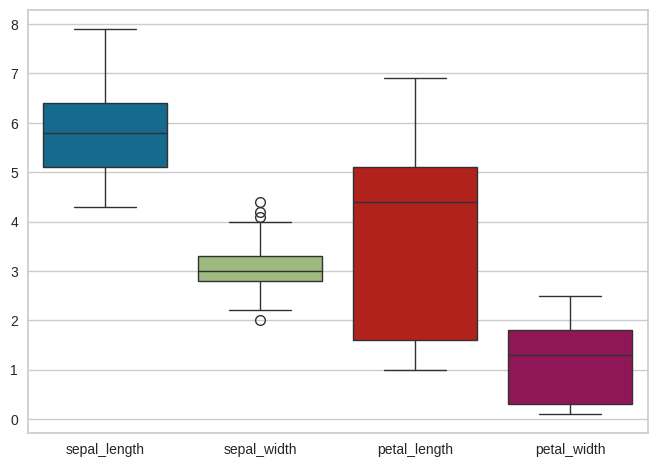

In [ ]:
sns.boxplot(df) # For Outlier detection
plt.show()

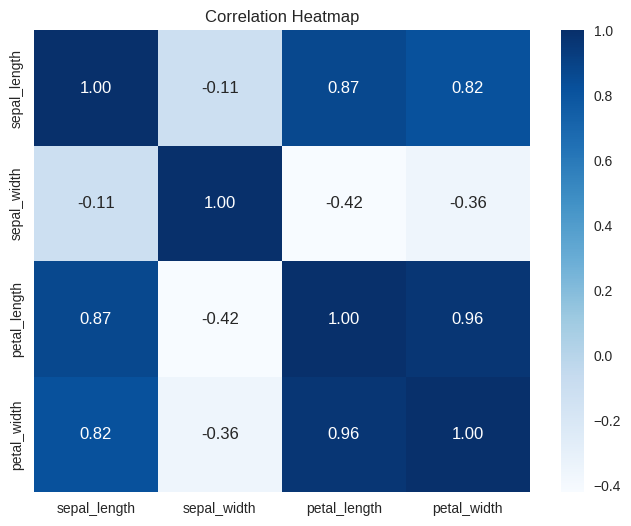

In [ ]:
# Correlation Heatmap (Bivariate Analysis)
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation matrix
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix,cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

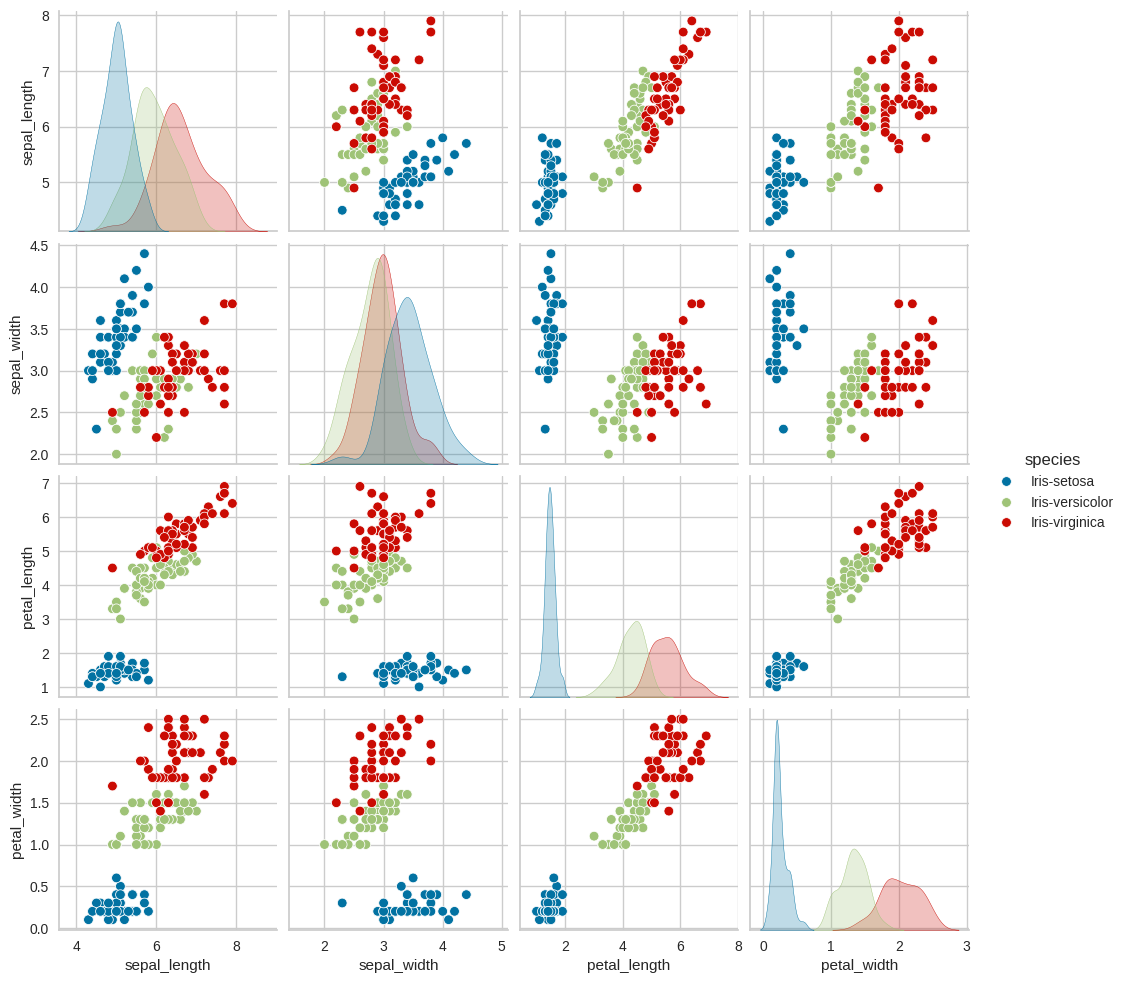

In [ ]:
sns.pairplot(df, hue='species') # Used For Multivariate analysis (to check skewness or pattern of data)
plt.show()
# You will see Density plots on diagonal (most probably)

Encoding of Categorical column with dummy label

In [ ]:
# Convert 'species' to numerical labels (0, 1, 2) and store them in a new column
df['target'] = df['species'].astype('category').cat.codes
df.head(5) #See the new column that we made named target

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# 6. Feature Engineering
- Often not needed for simple datasets like Iris, also it requires domain knowledge

# 7. Data Splitting

In [ ]:
X = df.drop(['target', 'species'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Model Selection

In [ ]:
model = LogisticRegression(max_iter=1000)

# 9. Model Training

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 10. Model prediction and Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("-------------------")
print("Classification Report")
print("-------------------")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9333333333333333
-------------------
Classification Report
-------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



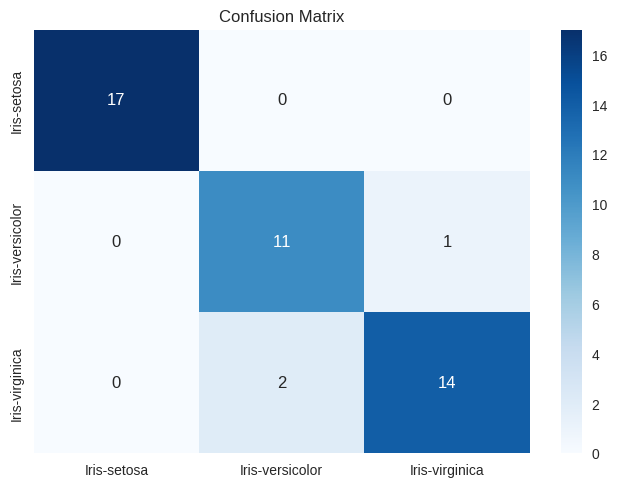

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['species'].unique(), yticklabels=df['species'].unique()) # Use original species names
plt.title('Confusion Matrix')
plt.show()

# 11. Hyperparameter Tuning (Optional)
# 12. Model Deployment (Optional)
